https://www.kaggle.com/shivanirana63/fake-job-prediction-ensemble-modeling

We will apply 3 different classification algorithms to gain maximum possible accuracy score which are:

1) Logistic Regression
2) K Nearest Neighbours
3) Random Forest
For training these models,

Independent variable : X
Dependent variable : Y (Check if posted job is fake or not)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("fake_job_postings.csv")
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [569]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [5]:
df[df.isnull().any(axis=1)]

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [6]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [7]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.employment_type.mode()

0    Full-time
dtype: object

In [15]:
df.employment_type.value_counts()

Full-time    11620
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: employment_type, dtype: int64

In [16]:
df['employment_type'] = df['employment_type'].fillna(df['employment_type'].mode()[0])

In [17]:
df.employment_type.value_counts()

Full-time    15091
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: employment_type, dtype: int64

In [19]:
df[['employment_type','fraudulent']].value_counts()

employment_type  fraudulent
Full-time        0             14360
Contract         0              1480
Full-time        1               731
Part-time        0               723
Temporary        0               239
Other            0               212
Part-time        1                74
Contract         1                44
Other            1                15
Temporary        1                 2
dtype: int64

In [570]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [571]:
df.shape

(17880, 18)

In [572]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [573]:
# Check if there is any null value
df.isna().apply(pd.value_counts)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
False,17880.0,17880.0,17534,6333,2868,14572,17879,15185,10670,17880.0,17880.0,17880.0,14409,10830,9775,12977,11425,17880.0
True,NaN,NaN,346,11547,15012,3308,1,2695,7210,NaN,NaN,NaN,3471,7050,8105,4903,6455,NaN


In [574]:
#drop the duplicate values
df.drop_duplicates(inplace=True)

In [575]:
#Check if any duplicate rows in dataset
df.duplicated().sum()

0

In [576]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [577]:
df = df.drop(columns=['salary_range'])
df = df.drop(columns=['department'])
df.shape

(17880, 16)

In [578]:
df.dropna(axis= 0, how= 'any', inplace=True)
df.shape

(4441, 16)

In [579]:
df.isnull().sum()

job_id                 0
title                  0
location               0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [580]:
df.shape

(4441, 16)

In [581]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4441 entries, 3 to 17876
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               4441 non-null   int64 
 1   title                4441 non-null   object
 2   location             4441 non-null   object
 3   company_profile      4441 non-null   object
 4   description          4441 non-null   object
 5   requirements         4441 non-null   object
 6   benefits             4441 non-null   object
 7   telecommuting        4441 non-null   int64 
 8   has_company_logo     4441 non-null   int64 
 9   has_questions        4441 non-null   int64 
 10  employment_type      4441 non-null   object
 11  required_experience  4441 non-null   object
 12  required_education   4441 non-null   object
 13  industry             4441 non-null   object
 14  function             4441 non-null   object
 15  fraudulent           4441 non-null   int64 
dtypes: in

In [582]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000
mean,8855.927719,0.061473,0.978608,0.642423,0.036253
std,4989.560494,0.240222,0.144702,0.479341,0.186940
min,4.000000,0.000000,0.000000,0.000000,0.000000
25%,4634.000000,0.000000,1.000000,0.000000,0.000000
50%,8837.000000,0.000000,1.000000,1.000000,0.000000
75%,13024.000000,0.000000,1.000000,1.000000,0.000000
max,17877.000000,1.000000,1.000000,1.000000,1.000000


In [583]:
fraud = df[df['fraudulent']== 1]
fraud.shape

(161, 16)

In [584]:
not_fraud = df[df['fraudulent']== 0]
not_fraud.drop_duplicates()
not_fraud = not_fraud.head(161)

In [585]:
fraud.shape, not_fraud.shape

((161, 16), (161, 16))

In [586]:
not_fraud.duplicated().sum()

0

In [587]:
fraud.duplicated().sum()

0

In [588]:
df = fraud.append(not_fraud)
df.reset_index()

,index,job_id,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,98,99,IC&E Technician,"US, , Stocton, CA",...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
1,173,174,Technician Instrument & Controls,US,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",0,1,1,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,1
2,215,216,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso",...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abiliti...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
3,573,574,Senior Engineering Product Manager,"US, CA, San Jose",Aptitude Staffing Solutions has redesigned the...,Senior Engineering Product ManagerAs a member ...,Skills and Requirements MSEE with 5 years of e...,"What is offered:Broad responsibility, autonomy...",0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Computer Networking,Engineering,1
4,628,629,UST Testing Technician II,"US, CA, Bakersfield",Jaco Oil and Refined Resources have partnered ...,Qualified candidates are encouraged to apply d...,Job site set-up.Loading and unloading of equip...,Competitive compensation package including bas...,0,1,1,Full-time,Mid-Senior level,Certification,Oil & Energy,Other,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,720,721,Technology Services Manager,"US, MN, St. Paul",Our mission is to love others by removing frus...,The Technology Services Manager will spend app...,ExperienceMinimum each of:10 years in Informat...,Depending on a candidate's experience and matc...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
318,723,724,Head of Marketing,"US, CA, Santa Monica",We’re always looking for highly motivated “fou...,The Mobile Majority has invented an entirely n...,Our ideal candidate MUST HAVE the following qu...,"It's no secret that we work hard, but we also ...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Marketing and Advertising,Marketing,0
319,726,727,"Account Executive - Redlands, CA","US, CA, Redlands",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
320,728,729,Operations & Logistics Manager - NYC,"US, NY, New York City","Shyp is the easiest way to send anything, anyw...",The Operations &amp; Logistics Manager role pr...,2-5 years of operational/analytical experience...,"Opportunity to play a key role in a ""magical"" ...",0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Logistics and Supply Chain,Management,0


Data Preprocessing & PCA

In [589]:
from sklearn.preprocessing import LabelEncoder 

In [590]:
le = LabelEncoder()
df['title'] = le.fit_transform(df['title'])
df['location'] = le.fit_transform(df['location'])
df['company_profile'] = le.fit_transform(df['company_profile'])
df['description'] = le.fit_transform(df['description'])
df['benefits'] = le.fit_transform(df['benefits'])
df['requirements'] = le.fit_transform(df['requirements'])
df['employment_type'] = le.fit_transform(df['employment_type'])
df['required_experience'] = le.fit_transform(df['required_experience'])
df['required_education'] = le.fit_transform(df['required_education'])
df['industry'] = le.fit_transform(df['industry'])
df['function'] = le.fit_transform(df['function'])

In [591]:
df = df.reset_index()
df.head()

,index,job_id,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,98,99,114,51,140,92,163,32,0,1,1,1,5,3,43,21,1
1,173,174,232,48,38,180,113,252,0,1,1,1,5,2,20,21,1
2,215,216,116,57,140,93,250,31,0,1,1,1,5,3,43,21,1
3,573,574,203,68,7,162,200,224,0,1,1,1,5,1,9,11,1
4,628,629,237,55,58,143,119,75,0,1,1,1,5,2,43,21,1


In [592]:
df.columns

Index(['index', 'job_id', 'title', 'location', 'company_profile',
       'description', 'requirements', 'benefits', 'telecommuting',
       'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [593]:
df = df[[ 'title', 'location', 'company_profile',
       'description', 'requirements', 'benefits', 'telecommuting',
       'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function','fraudulent']]

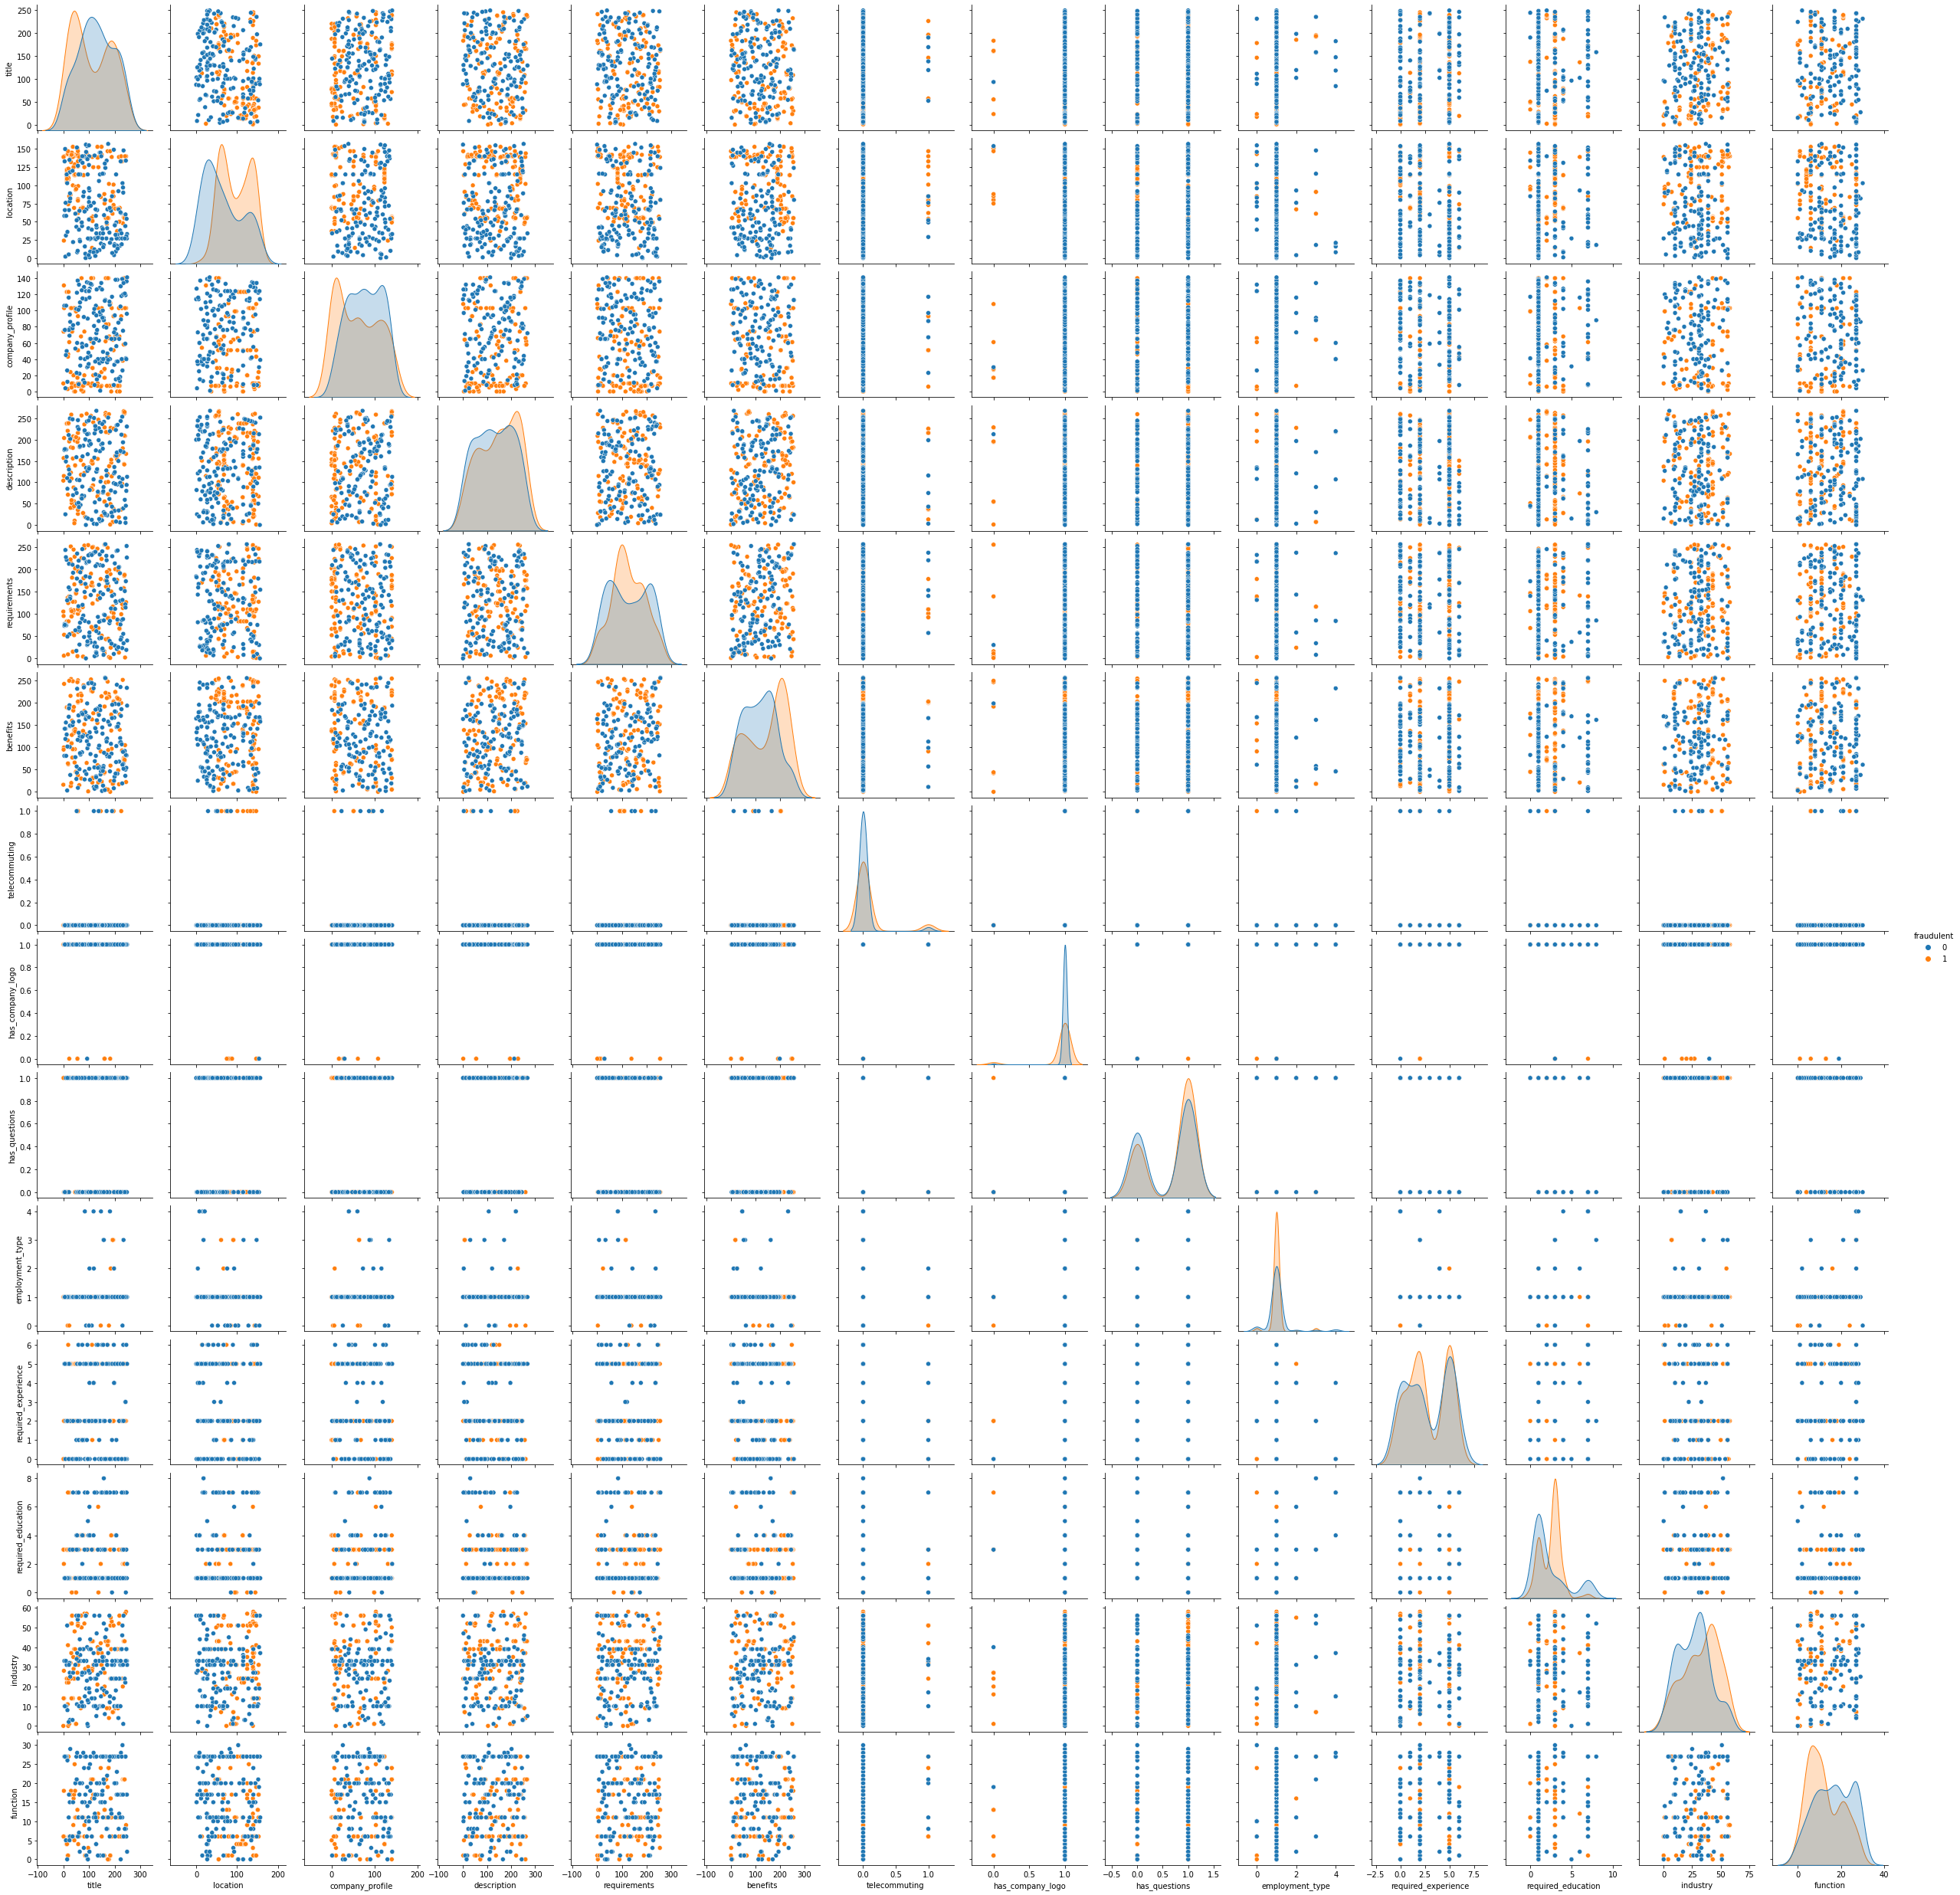

In [594]:
sns.pairplot(df, hue='fraudulent', vars=[ 'title', 'location', 'company_profile',
       'description', 'requirements', 'benefits', 'telecommuting',
       'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function'])
plt.show()

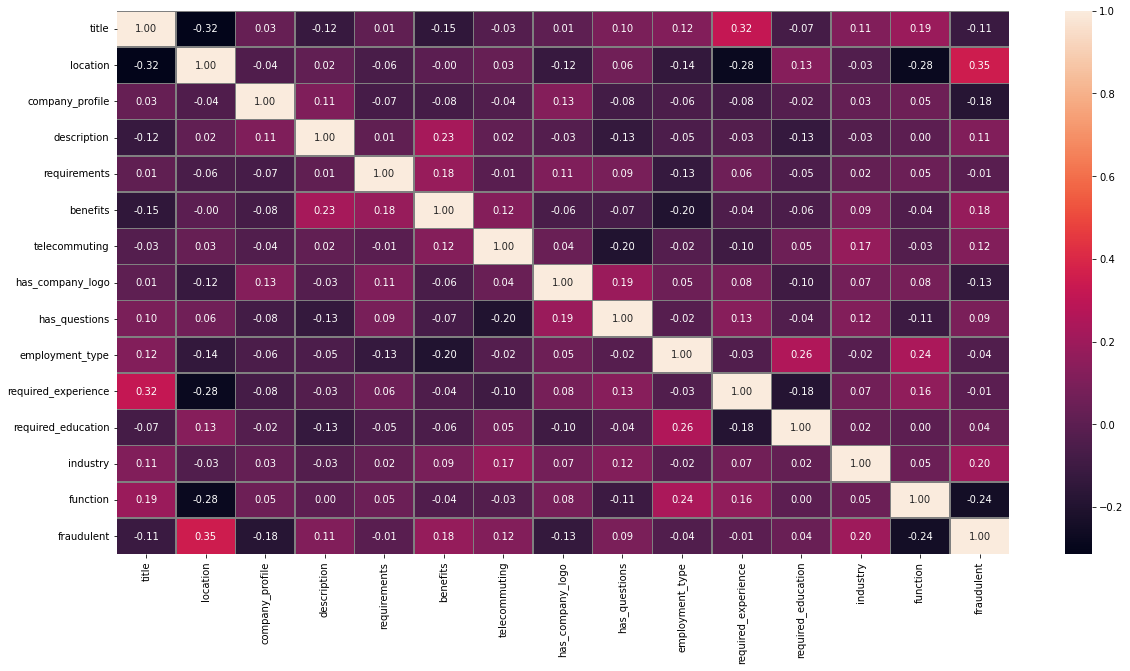

In [595]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, linewidth=.5, fmt='.2f', linecolor = 'grey')
plt.show()

In [596]:
from sklearn.model_selection import train_test_split

In [597]:
X = df[['title', 'location', 'company_profile',
       'description', 'requirements', 'benefits', 'telecommuting',
       'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function']].values
Y = df[['fraudulent']].values

Eigenvalues:
[7.80412815e+03 5.65569252e+03 5.13330044e+03 3.93156730e+03
 1.91610378e+03 1.65664039e+03 2.26156939e+02 6.35464636e+01
 3.99429054e+00 2.76099811e+00 2.15950115e-01 1.98816654e-01
 4.99451661e-02 2.35306784e-02]

Variances (Percentage):
[2.95673863e+01 2.14276396e+01 1.94484604e+01 1.48954716e+01
 7.25951441e+00 6.27648923e+00 8.56837489e-01 2.40757558e-01
 1.51331102e-02 1.04605532e-02 8.18167045e-04 7.53253751e-04
 1.89226521e-04 8.91503374e-05]



Text(0, 0.5, 'Explained variance (%)')

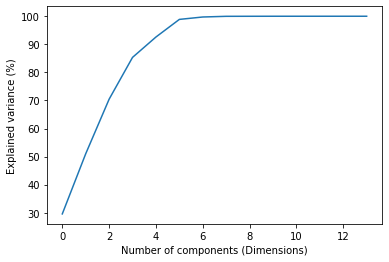

In [598]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X)

# Get the eigenvalues
print("Eigenvalues:")
print(pca.explained_variance_)
print()

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

In [599]:
# Apply PCA to keep only first 6 componenents
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X)

# Get the transformed dataset
X_pca = pd.DataFrame(X_pca)
print(X_pca.head())
print("\nSize: ")
print(X_pca.shape)

           0           1          2           3          4          5
0  82.205685    6.976239 -14.764860   79.673389  75.101869  15.603174
1 -50.067926   73.527029  98.459961 -111.996673 -29.631847   2.150174
2  63.097597   73.513988 -29.221422  129.732053  76.318422   5.492844
3 -53.985042  123.072830  45.619413  -42.488798 -58.040631  -3.634022
4  81.472804   32.448098  97.344665    6.166982 -21.735045  -0.113503

Size: 
(322, 6)


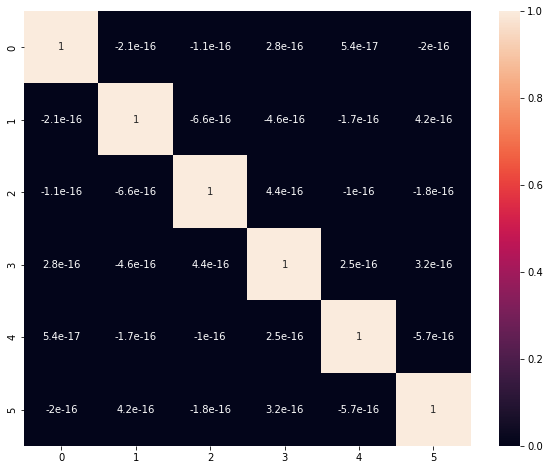

In [600]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(X_pca.corr(), 
            annot=True)

In [601]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y)  #33.6% split
#RERUN CODE WITH X_pca and Without X_pca (X) and show the accuracies result

In [602]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((241, 6), (81, 6), (241, 1), (81, 1))

1. LOGISTIC REGRESSION

In [603]:
from sklearn.linear_model import LogisticRegression

In [604]:
lgr = LogisticRegression()

In [605]:
lgr.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [606]:
Y_pred = lgr.predict(X_test)

In [607]:
Y_test = Y_test.flatten()
Y_pred = Y_pred.flatten()

In [608]:
df_lgr = pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
df_lgr

,Y_test,Y_pred
0,0,1
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
76,0,1
77,1,1
78,1,1
79,0,0


In [609]:
from sklearn.metrics import accuracy_score, confusion_matrix
lgr_accuracy = accuracy_score(Y_pred, Y_test)

In [610]:
confusion_matrix(Y_test, Y_pred)

array([[26, 17],
       [ 9, 29]])

2. k Nearest Neighbours

In [611]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [612]:
Y_pred = knn.predict(X_test)
Y_test = Y_test.flatten()
Y_pred = Y_pred.flatten()

In [613]:
df_knn = pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
df_knn

,Y_test,Y_pred
0,0,0
1,1,1
2,0,1
3,1,1
4,0,1
...,...,...
76,0,1
77,1,1
78,1,1
79,0,0


In [614]:
confusion_matrix(Y_test, Y_pred)

array([[26, 17],
       [ 4, 34]])

In [615]:
knn_accuracy = accuracy_score(Y_pred,Y_test)
knn_accuracy

0.7407407407407407

3. Random Forest



In [616]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [617]:
Y_pred = rfc.predict(X_test)
Y_test = Y_test.flatten()
Y_pred = Y_pred.flatten()

In [618]:
df_rfc = pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
df_rfc

,Y_test,Y_pred
0,0,1
1,1,0
2,0,0
3,1,1
4,0,0
...,...,...
76,0,1
77,1,1
78,1,1
79,0,0


In [619]:
confusion_matrix(Y_test, Y_pred)

array([[29, 14],
       [ 8, 30]])

In [620]:
rfc_accuracy = accuracy_score(Y_pred,Y_test)

4. SVM Classifier

In [621]:
from sklearn.svm import SVC
from sklearn import svm
svc = SVC()

clf=svm.SVC(probability=True)
clf.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [622]:
Y_pred = clf.predict(X_test)
Y_test = Y_test.flatten()
Y_pred = Y_pred.flatten()

In [623]:
df_svc = pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
df_svc

,Y_test,Y_pred
0,0,0
1,1,0
2,0,0
3,1,1
4,0,0
...,...,...
76,0,1
77,1,1
78,1,1
79,0,0


In [624]:
confusion_matrix(Y_test, Y_pred)

array([[32, 11],
       [ 7, 31]])

In [625]:
svc_accuracy = accuracy_score(Y_pred,Y_test)

Decision Tree Classifier

In [626]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [627]:
Y_pred = dtc.predict(X_test)
Y_test = Y_test.flatten()
Y_pred = Y_pred.flatten()

In [628]:
df_dtc = pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
df_dtc

,Y_test,Y_pred
0,0,1
1,1,0
2,0,1
3,1,1
4,0,0
...,...,...
76,0,1
77,1,1
78,1,0
79,0,0


In [629]:
confusion_matrix(Y_test, Y_pred)

array([[25, 18],
       [ 8, 30]])

In [630]:
dtc_accuracy = accuracy_score(Y_pred,Y_test)

Ensamble Modelling

In [631]:
#VotingClassifier

from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[('lgr', lgr), ('dtc', dtc), ('knn', knn), ('rfc',rfc), ('svc',clf)]
#create our voting classifier, inputting our models
voting_ens  = VotingClassifier(estimators, voting='hard')
#fit model to training data
#test our model on the test data
envf_score  = ensemble.score(X_test, Y_test)

print("Accuracy Values")
# Fit and predict with the models and ensemble
for clf in (lgr, dtc, knn,rfc,clf, voting_ens):
   clf.fit(X_train, Y_train)
   y_pred = clf.predict(X_test)
   print(clf.__class__.__name__, accuracy_score(Y_test, Y_pred))


print("\n\nMean Values")
for clf in (lgr, dtc, knn,rfc,clf, voting_ens):
   clf.fit(X_train, Y_train)
   y_pred = clf.predict(X_test)
   print(clf.__class__.__name__,  mean_absolute_error(Y_test,Y_pred))   

Accuracy Values
LogisticRegression 0.6790123456790124
DecisionTreeClassifier 0.6790123456790124
KNeighborsClassifier 0.6790123456790124
RandomForestClassifier 0.6790123456790124


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_o

SVC 0.6790123456790124


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier 0.6790123456790124


Mean Values
LogisticRegression 0.32098765432098764
DecisionTreeClassifier 0.32098765432098764
KNeighborsClassifier 0.32098765432098764


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier 0.32098765432098764


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier 0.32098765432098764


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier 0.32098765432098764


In [632]:
#Standard stacking for a classification task

from mlxtend.classifier import StackingClassifier
# Initialize individual models

estimators=[('lgr', lgr), ('dtc', dtc), ('knn', knn), ('rfc',rfc), ('svc',clf)]

# Initialize meta-model
clf_meta = SVC()
# Create stacking classifier
clf_stack = StackingClassifier( classifiers=[lgr, dtc, knn, rfc,clf], meta_classifier=clf_meta, use_probas=False, use_features_in_secondary=False)
# Fit and predict with the models and ensemble
print("Accuracy Values")
for clf in (lgr, dtc, knn, rfc, clf, clf_meta, clf_stack):
   clf.fit(X_train, Y_train)
   y_pred = clf.predict(X_test)
   print(clf.__class__.__name__, accuracy_score(Y_test, y_pred))

print("\n\nMean Values")
for clf in (lgr, dtc, knn, rfc, clf, clf_meta, clf_stack):
   clf.fit(X_train, Y_train)
   y_pred = clf.predict(X_test)
   print(clf.__class__.__name__, mean_absolute_error(Y_test, y_pred))  

Accuracy Values
LogisticRegression 0.6790123456790124
DecisionTreeClassifier 0.6666666666666666
KNeighborsClassifier 0.7407407407407407


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


RandomForestClassifier 0.7654320987654321


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier 0.7530864197530864
SVC 0.7777777777777778


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/classifier/stacking_classification.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf.fit(X, y)
/usr/local/lib/python3.7/dist-packages/mlxtend/classifier/stacking_classification.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,)

StackingClassifier 0.691358024691358


Mean Values
LogisticRegression 0.32098765432098764
DecisionTreeClassifier 0.2962962962962963
KNeighborsClassifier 0.25925925925925924
RandomForestClassifier 0.2345679012345679


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/classifier/stacking_classification.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf.fit(X, y)
/usr/local/lib/python3.7/dist-packages/mlxtend/classifier/stacking_classification.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

StackingClassifier 0.30864197530864196
SVC 0.2222222222222222


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


StackingClassifier 0.2962962962962963


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
